In [1]:
## This scripts creates a figure showing the years and data volumes of different missions.
# It also adds the data volumes of different archives (arrows)
# 
# Version 14 May, 2021

# Adapted from Desai, V., et al. 2019, Science Platform Network,  Figure 1
# Origianl version : # Origianl version : 

In [2]:
import numpy as np
#import os, sys
from astropy.table import Table

In [3]:
# matplotlib plotting (to remove)
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as path_effects
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
#mpl.rc('text', usetex=True)
mpl.rc('font', family='sans-serif')
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

cols = plt.get_cmap("tab10").colors
#colmap = plt.get_cmap("gist_earth")(np.arange(0,200))
colmap = plt.get_cmap("terrain")(np.arange(0,250))
markertypes = ["o","v","^","<",">","8","s","p","P","*","h","H","X","D","d" , "o","v","^","<",">","8","s","p","P","*","h","H","X","D","d"]

In [4]:
# Bokeh for pplotting 
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6

#Bokeh libraries and modules
from bokeh.io import  show, reset_output, output_notebook, export_png
from bokeh.plotting import figure
from bokeh.models import Range1d, FactorRange, ColumnDataSource, LabelSet, HoverTool
from bokeh.layouts import gridplot, row, column
from bokeh.transform import factor_cmap
from bokeh.models.annotations import Label
from bokeh.palettes import Spectral5, Viridis256, Colorblind, Magma256, Turbo256, Blues8

#Setting visualizations' display to the in-notebook mode
output_notebook()

#Setting Bokeh's visualtization toolset - a set of functional tools attached to every visual
#Their names are pretty self-explanatory
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

Loading BokehJS ...

In [5]:
# Text to annotate plot with 
adapted_text = "Updated from Desai, V., et al. 2019, Figure 1"

In [6]:
### DATA (edit this section if needed) ####

# Structure
# Sort these by year!
# keys = mission
# then list with [year start , year end, year plot* , volume in TB , flag]
# * meaning the year for which the number of TB is accurate
# note that "year plot" and "volume in TB" can be a tuple. The entries in the tuple are then connected with a line.
# 9999 if ongoing and no decided end
# flag = 1 for space based and 2 for ground based
data = dict()

data["DPOSS"] = [1980,1990,1990,3,2]
data["IRAS"] = [1983,1983,1983,2.9,1]
data["HST"] = [1990,9999,2019,500,1]
data["2MASS"] = [1997,2001,2001,27,1]
data["Chandra"] = [1999,9999,2019,34.3,1]

# 2021-05-14 updates. 
#DR16 : 273 TB  - this is the volume of all data in the DR
# https://www.sdss.org/dr16/data_access/volume/
data["SDSS (DR16)"] = [2000,2019.12,2019.12,273,2]
#https://www.sdss.org/dr15/data_access/volume/
#data["SDSS (DR15)"] = [2000,2018.8,2018.8,170,2]


data["Spitzer"] = [2003,9999,2019,133.44,1]

# DR1
#data["PanSTARRS (DR1)"] = [2008,2014,2014,2000,2]
# 2019 PS1 DR2, 1.6 PB 
# https://archive.stsci.edu/panstarrs/#:~:text=Pan%2DSTARRS%20Data%20Release%202,of%20astronomical%20information%20ever%20released.
data["PanSTARRS (DR2)"] = [2008,2019.1,2019.1,1600,2]

data["Herschel"] = [2009,2013,2013,80,1]
data["Planck"] = [2009,2013,2013,154,1]
data["WISE/NEOWISE"] = [2009,9999,2019,428,1]
data["ALMA"] = [2012,9999,(2019,2025,2030),(1e3,3e3,5.5e3),2]

# currently extension until the end of 2022 has been approved and an indicative approval until the end of 2025 has been given
# until 2025: https://sci.esa.int/web/director-desk/-/extended-operations-confirmed-for-science-missions
# https://www.cosmos.esa.int/web/gaia/release
# 1PB archive for 2022
data["Gaia"] = [2013,2022,2022,1000,1]


data["VLA Sky Survey"] = [2017,2024,2024,2000,2]
data["ZTF"] = [2018,9999,2019,3000,2]
data["ASKAP"] = [2019,9999,2025,25000,2]

#Future 
data["JWST"] = [2021,2025,2025,750,1]
data["Euclid"] = [2022,2028,2028,15000,1]

# 2021-05-14 updates
# 20 TB 
#data["LSST"] = [2022,2032,2032,200000,2]
data["Rubin"] = [2022,2032,2032,200000,2]


# 2021-05-14 updates
# 32TB is roughly the size of the raw data from the spacecraft in the two-year primary mission. 
# That would be comparable to something like a 35-50PB raw data volume from Rubin in ten years. 
# Final archive is 600TB (GPDF 2021)
#data["SPHEREx"] = [2024,2026,2027,32,1]
data["SPHEREx"] = [2024,2026,2027,600,1]
# data["SPHEREx"] = [2023,2025,2025,32,1]

# 2021-05-14 updates
# 20 OB archive after its 5 year mission
data["Roman"] = [2025,2030,2030,2.2e3,1]
#data["WFIRST"] = [2025,2030,2030,2.2e3,1]


# 2021-05-14 updates
# https://royalsocietypublishing.org/doi/10.1098/rsta.2019.0060
# Archive of 8.5 Exabytes over the 15-year lifespan
#data["SKA"] = [2019,9999,2027,25000,2]
# data["SKA"] = [2027,9999,2027,1.5e7,2]

2027, 15 * 10**14, '150TB', '3ZB', '' 

# Archives
archives = dict()
archives["NED"] = [2019, 12]
archives["HEASARC"] = [2019, 120]
archives["CADC"] = [2019, 1000]
#archives["IRSA"] = [2019, 1407]
archives["IRSA"] = [2019, 2800] # this is IRSA NASA + non-NASA
archives["NOIRLab"] = [2019,2000]
#archives["MAST"] = [2019,3000]
#archives["NRAO"] = [2019,3500]
archives["MAST, NRAO"] = [2019,3250]


# this is for plotting only.
# The first label will appear at this year and the other labels will be shifted from that to the right
archive_plot_start_year = 2037#1980 
plot_archives = True

# Today's year
YEAR = 2021

# plot extent of mission
# options are: "band", "wiggly_line", or "none"
plot_extent = "none"

# Path where to save figure
output_path = "./"

# Fun XKCD version
xkcd_on = False


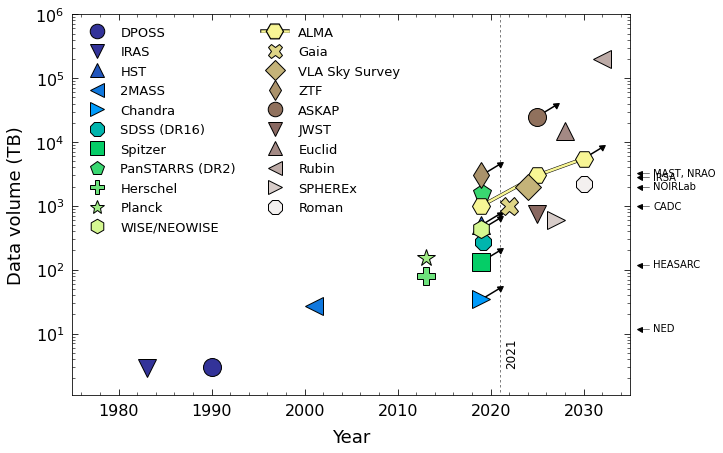

In [7]:
### Plot (usually no need to change anything below) ###

if xkcd_on: plt.xkcd()
fig = plt.figure(figsize=(10,7))
ax1 = plt.subplot(111)

for ii,key in enumerate(data.keys(),start=0):
    
        
    # color scale
    #col_idx_this = np.interp( ii , np.asarray([1,len(data.keys())-1]) , np.asarray([0,len(colmap)-1]) ).astype("int")
    col_idx_this = int( np.interp( ii , np.asarray([1,len(data.keys())-1]) , np.asarray([0,len(colmap)-1]) ) )

    # gather data
    xx1 = data[key][0] # start date
    xx2 = data[key][1] # end date
    dxx = xx2-xx1 # lifetime
    xx_plot = data[key][2] # where to plot symbol (corresponding to data volume)
    yy = data[key][3] # data volume
    dyy = 1
    
    # check if multiple data is available
    multiple_data = False
    try:
        multiple_data = len(data[key][2]) > 1
    except Exception as e:
        pass
    

    # the special case of limits (i.e., if mission is still on-going)
    is_limit = False
    if (xx2 == 9999):
        is_limit = True
        dxx = 2
        dyy = 1.5
        xx2 = xx_plot

    
    mrk = markertypes[ii]
    
    if is_limit:
        ax1.plot([np.max(xx_plot),np.max(xx_plot)+dxx],[np.max(yy),np.max(yy)*dyy],"-",color="black",linewidth=1.5)
        ax1.plot(np.max(xx_plot)+dxx,np.max(yy)*dyy,marker=(3,0,65), markersize=7,color="black")
    else:
        pass
    
    if plot_extent == "wiggly_line":
        mpl.rcParams['path.sketch'] = (2, 3, 1)
        if multiple_data:
            print("no plotting extent for entry with multiple years.")
        else:
            ax1.plot(np.asarray([xx1,xx2]) , np.asarray([yy,yy])*1 , '-',color=colmap[col_idx_this],linewidth=1 )
        mpl.rcParams['path.sketch'] = "none"
        
    if plot_extent == "band":
        if multiple_data:
            print("no plotting extent for entry with multiple years.")
        else:
            ax1.fill( np.asarray([xx1,xx2,xx2,xx1]) , np.asarray([yy*0.7,yy*0.7,yy*1.3,yy*1.3])*1.05 ,facecolor=colmap[col_idx_this],alpha=0.3, edgecolor="none"  )
    if plot_extent == "none":
        pass
    
    if multiple_data:
        ax1.semilogy(xx_plot,yy,mrk+"-",color=colmap[col_idx_this],linewidth=2.5 ,
                     #markersize=18,markerfacecolor=colmap[col_idx_this],markeredgecolor="black",markeredgewidth=0.01,
                     path_effects=[path_effects.Stroke(linewidth=3.5, foreground='black'),path_effects.Normal()],
                     label=key
                    )
        ax1.semilogy(xx_plot,yy,mrk,markersize=18,markerfacecolor=colmap[col_idx_this],markeredgecolor="black")
        #ax1.semilogy(xx_plot[:-1],yy[:-1],mrk,markersize=18,markerfacecolor=colmap[col_idx_this],markeredgecolor="black")
        #ax1.semilogy(xx_plot[-1],yy[-1],mrk,markersize=18,markerfacecolor=colmap[col_idx_this],markeredgecolor="black") # plot the last one with label
        
    else:
        ax1.semilogy(xx_plot,yy,mrk,markersize=18,markerfacecolor=colmap[col_idx_this],markeredgecolor="black",label=key)
    


##############        

ax1.plot([YEAR,YEAR],[1,1e7],"--",linewidth=0.5,color="black",dashes=(5,5),zorder=-1)
ax1.text(YEAR+0.5,5,YEAR,rotation=90,color="black",fontsize=12,ha="left",va="center")

## Add archives (in 2019)
#if plot_archives:
#    for ii, key in enumerate(archives):
#        xxx = archive_plot_start_year+(5*ii)
#        ax1.text(xxx+3,archives[key][1]*1.4,key,ha="center",va="center",fontsize=14,color="black")
#        ax1.plot(xxx+5,archives[key][1],marker=">", markersize=5,color="black")
#        ax1.plot([xxx+1,xxx+5],np.repeat(archives[key][1],repeats=2),"-", linewidth=1,color="black")

## Add archives (in 2019)
if plot_archives:
    for ii, key in enumerate(archives):
        xxx = archive_plot_start_year#+(5*ii)
        ax1.text(xxx+0.5,archives[key][1]*1,key,ha="left",va="center",fontsize=10,color="black",rotation=0)
        ax1.plot([xxx-0,xxx-1],np.repeat(archives[key][1],repeats=2),"-", linewidth=0.5,color="black", clip_on=False)
        ax1.plot(xxx-1,archives[key][1],marker="<", markersize=5,color="black", clip_on=False)

ax1.set_xlim(1975,2035)
ax1.set_ylim(1.1,1e6)  
ax1.set_xlabel("Year",fontsize=18,labelpad=10)

ax1.yaxis.set_label_position("left")
ax1.set_ylabel("Data volume (TB)",fontsize=18,labelpad=10)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# ax2.yaxis.set_label_position("right")
# ax2.yaxis.tick_left()
# ax2.set_ylabel("Archive Size (TB)",fontsize=18,labelpad=10)

ax1.tick_params(axis="both",which="major",labelsize=16,length=6,pad=8)
ax1.tick_params(axis="both",which="minor",length=3)
#ax1.legend(fontsize=12,frameon=True,ncol=2 , bbox_to_anchor=(1.01, 1.00))
lgnd = ax1.legend(loc="best",fontsize=13,frameon=False,ncol=2)

for l in lgnd.legendHandles:
    l._legmarker.set_markersize(14.5)


if xkcd_on:
    ax1.minorticks_off()
else:
    ax1.minorticks_on()
    
if xkcd_on:
    output_filename = "%s/figure_table1_xkcd.png" % output_path
else:
    output_filename = "%s/figure_table1.png" % output_path
plt.savefig(output_filename,bbox_inches='tight')
plt.show()



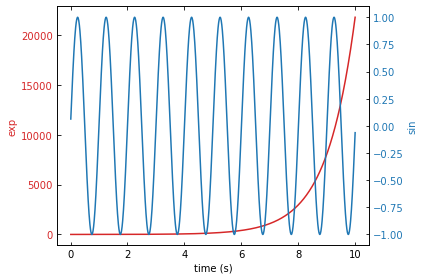

In [8]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()